Source: https://www.kaggle.com/code/alexisbcook/scatter-plots

## Scatter Plots

In this tutorial, you'll learn how to create advanced **scatter plots**.

## Set up the notebook

As always, we begin by setting up the coding environment. (This code is hidden, but you can un-hide it by clicking on the "Code" button immediately below this text, on the right.)

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


## Load and examine the data

We'll work with a (*synthetic*) dataset of insurance charges, to see if we can understand why some customers pay more than others.

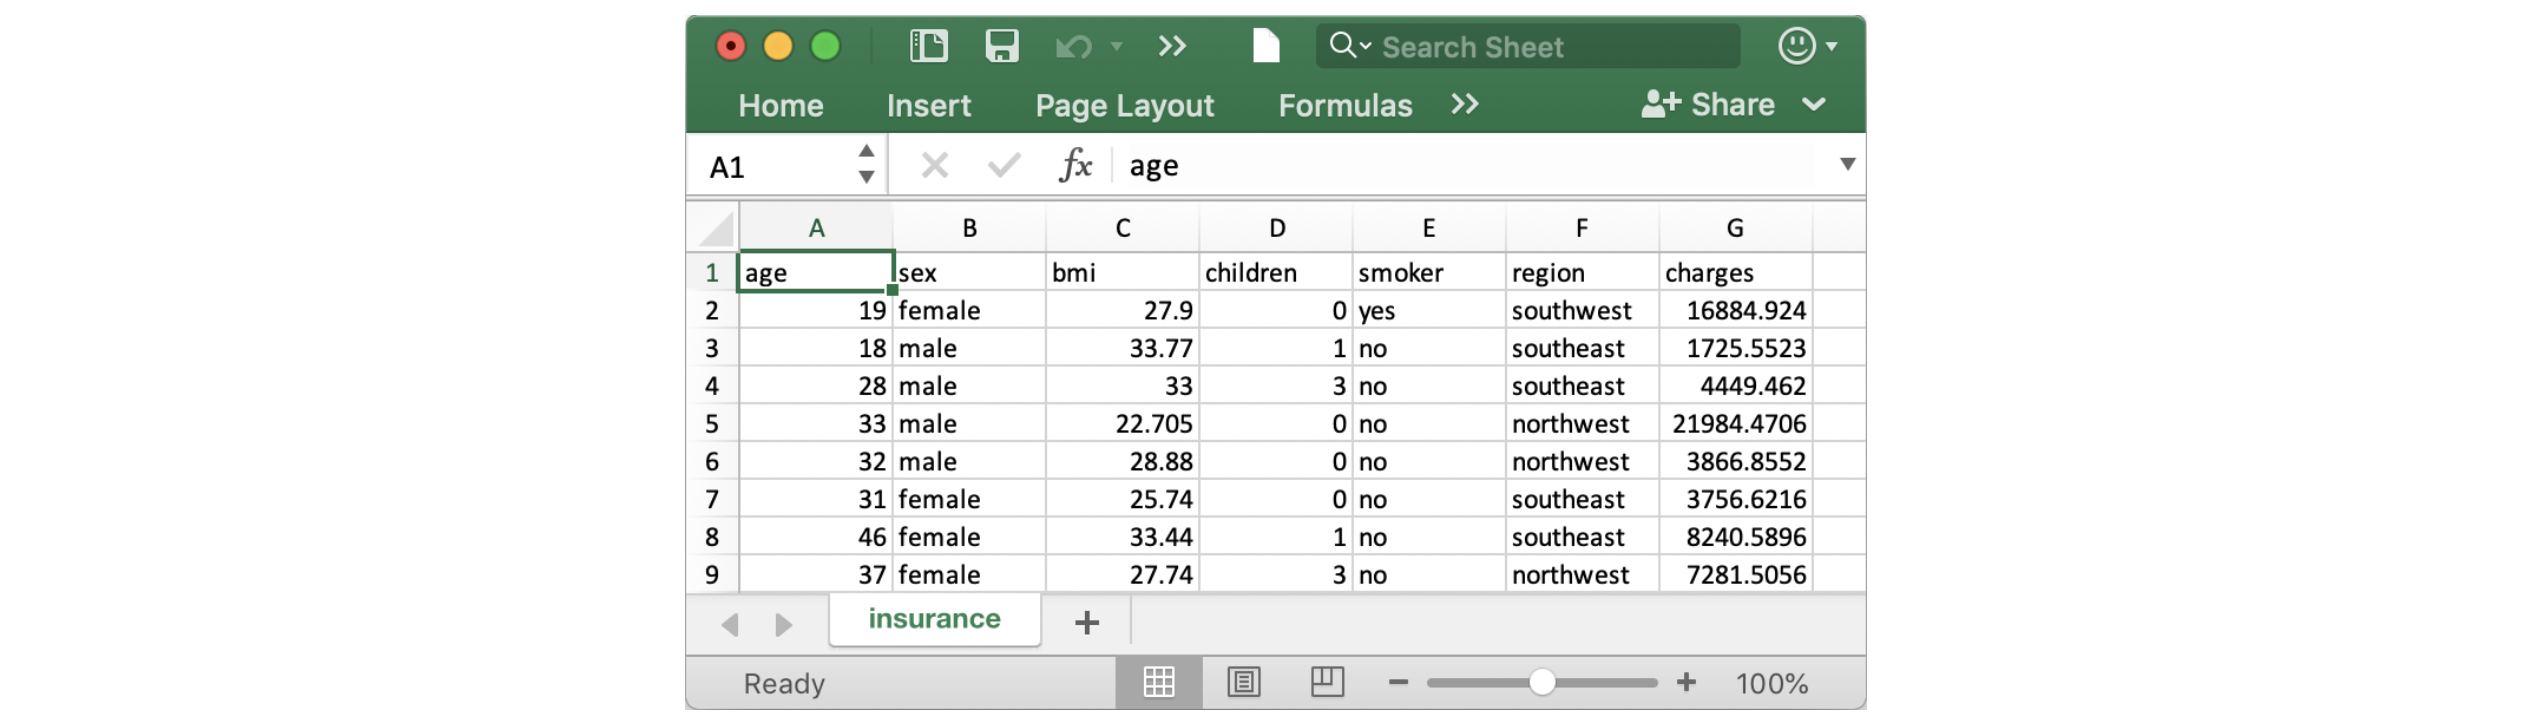

If you like, you can read more aout the dataset here: https://www.kaggle.com/mirichoi0218/insurance/home

In [2]:
# Path of the file to read
insurance_filepath = "SourceData/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

As always, we check that the dataset loaded properly by printing the first five rows.

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Scatter plots

To create a simple **scatter plot**, we use the [sns.scatterplot] command and specify the values for:

- the horizontal x-axis (x=insurance_data['bmi']), and
- the vertical y-axis (y=insurance_data['charges']).

<AxesSubplot:xlabel='bmi', ylabel='charges'>

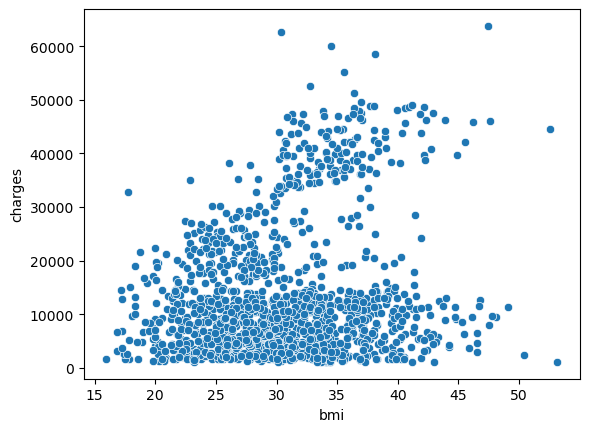

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterpplot above suggests that body maxx index (BMI) and insurance charges are **positively correlated**, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a **regression line**, or the line that best fits the data. We do this by changing the command to [sns.regplot].

<AxesSubplot:xlabel='bmi', ylabel='charges'>

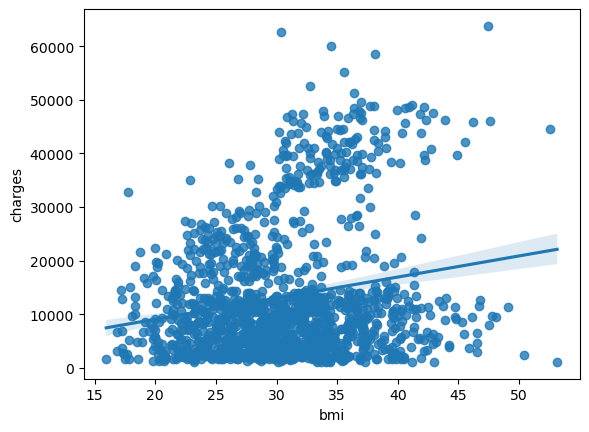

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color-coded scatter plots

We can use scatter plots to dispay the relationship between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi','charges') on the axes.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

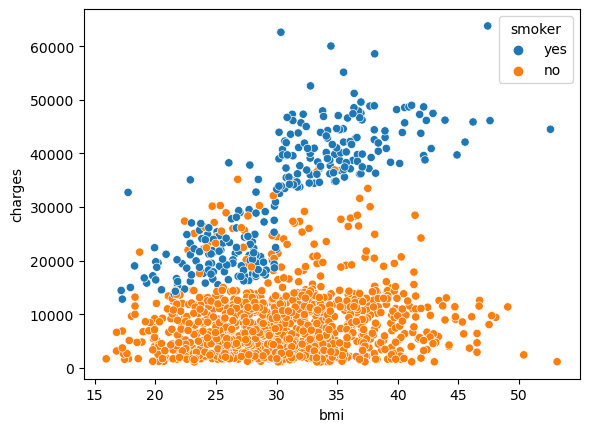

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the [sns.lmplot] command to add two regression lines corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

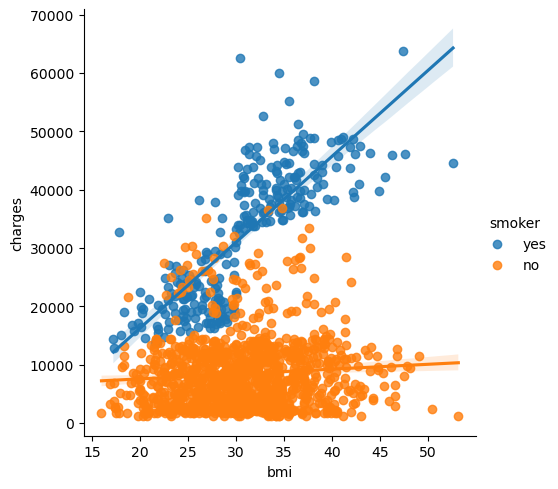

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

The [sns.lmplot] command above works slightly differently than the commands you have learn about so far:

- Instead of setting [x=insurance_data['bmi']] to select the 'bmi' column in [insurance_data], we set [x = "bmi"] to specify the name of the column only.
- Similarly, [y="charges"] and [hue="smoker"] also contain the names of columns.
- We specify the dataset with [data=insurance_data].

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlught the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a **categorical scatter plot**, and we build it with the [sns.swarmplot] command.

C:\Users\rober\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

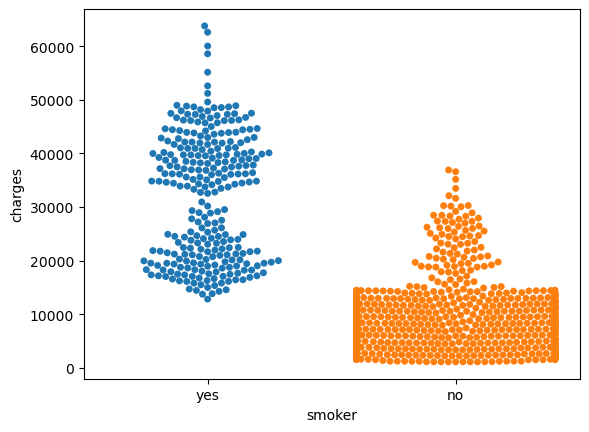

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:

- on average, non-smokers are charged less tha smokers, and
- the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.